In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Input, concatenate, Flatten, Dense, Dropout, Add
from tensorflow.keras.models import Model
from tensorflow.keras import models
from keras.utils.vis_utils import plot_model

In [2]:
cratched_model = Sequential([
    # Input(shape=(256, 256, 3)),
    layers.Conv2D(filters=112, kernel_size=(5,5),  activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(filters=80, kernel_size=(3,3), strides=(1,1),  activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(filters=128, kernel_size=(5,5), strides=(1,1),  activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1),  activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1),  activation='relu'),

    # layers.Flatten(),
    # layers.Dense(units=768, activation='relu'),
    # layers.Dropout(0.5),
    # layers.Dense(units=4, activation='softmax')

])
# cratched_model.summary()

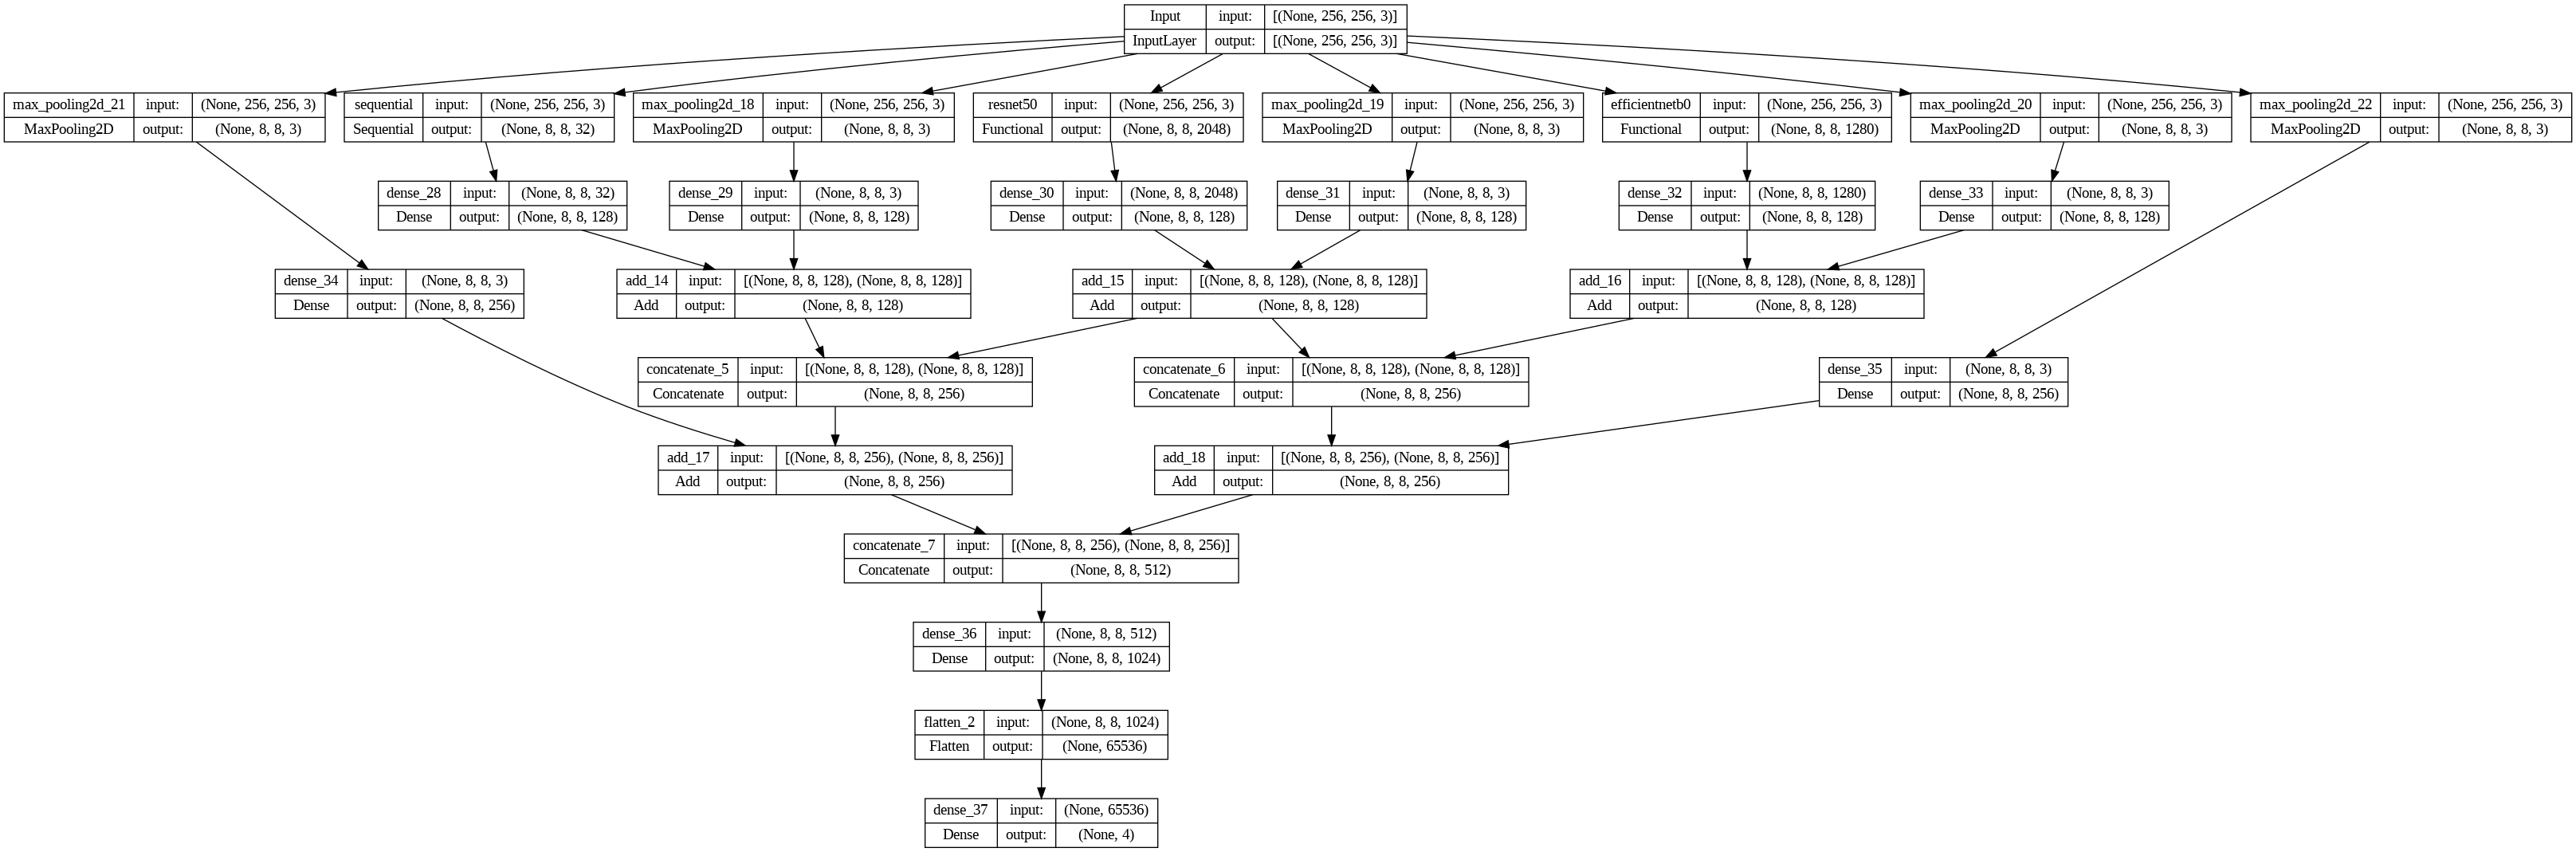

In [8]:
img_size = 256
ip_img = Input(shape=(img_size,img_size,3), name="Input")

# first ensemble

#Model 1
model1 = cratched_model(ip_img)
dense1 = Dense(128, activation='relu')(model1)

#Skipping connection 1
skip_img1 = layers.MaxPooling2D(pool_size=(32,32), strides=(32,32))(ip_img)
skip_dense1 = Dense(128, activation='relu')(skip_img1)
skip_conn1 = Add()([dense1, skip_dense1])

#Model 2
model2 = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))(ip_img)
# model2 = Model(inputs=model2.input, outputs=model2.output, name='resnet50_1')
dense2 = Dense(128, activation='relu')(model2)

#Skipping connection 2
skip_img2 = layers.MaxPooling2D(pool_size=(32,32), strides=(32,32))(ip_img)
skip_dense2 = Dense(128, activation='relu')(skip_img2)
skip_conn2 = Add()([dense2, skip_dense2])

#Model 3
model3 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))(ip_img)
dense3 = Dense(128, activation='relu')(model3)

#Skipping connection 3
skip_img3 = layers.MaxPooling2D(pool_size=(32,32), strides=(32,32))(ip_img)
skip_dense3 = Dense(128, activation='relu')(skip_img3)
skip_conn3 = Add()([dense3, skip_dense3])




#Merging model 1 and 2
concat12 = concatenate([skip_conn1, skip_conn2])  # Merge dense1 and dense2

#Skipping connection 12
skip_img12 = layers.MaxPooling2D(pool_size=(32,32), strides=(32,32))(ip_img)
skip_dense12 = Dense(256, activation='relu')(skip_img12)
skip_conn12 = Add()([concat12, skip_dense12])



# #Model 4
# model4 = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))(ip_img)
# model4 = Model(inputs=model4.input, outputs=model4.output, name='resnet50_2')
# dense4 = Dense(128, activation='relu')(model4)

# #Skipping connection 4
# skip_img4 = layers.MaxPooling2D(pool_size=(32,32), strides=(32,32))(ip_img)
# skip_dense4 = Dense(128, activation='relu')(skip_img4)
# skip_conn4 = Add()([dense4, skip_dense4])

#Merging model 2 and 3
concat23 = concatenate([skip_conn2, skip_conn3])  # Merge dense1 and dense2

#Skipping connection 23
skip_img23 = layers.MaxPooling2D(pool_size=(32,32), strides=(32,32))(ip_img)
skip_dense23 = Dense(256, activation='relu')(skip_img23)
skip_conn23 = Add()([concat23, skip_dense23])


#Merging 12 and 23
concat12_23 = concatenate([skip_conn12, skip_conn23])  # Merge dense1 and dense2


#output
output = Dense(1024, activation='relu')(concat12_23)
output = Flatten()(output)
output = Dense(4, activation='softmax')(output)

# Create the model
model = Model(inputs=ip_img, outputs=output)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)